# DATA620 - Final Project - An Analysis on Netflix Data

For this final project, I plan to use Netflix data for a sentiment and network analysis on Netflix content. I will do this through a Kaggle dataset (found here: https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download). This data includes information on movie titles, show titles, cast, directors, country, release date, rating, descriptions, and duration. After the data is preprocessed, I will apply sentiment analysis techniques to determine overall sentiment from each movie judged by its description. Using this data, I will construct a network graph. Then, I can also make other visualizations such as word clouds and sentiment distributions. My goal is to use as many skills as I can from what we have learned throughout the semester, in order to improve and maintain my skillset. My guiding question is as follows: What makes certain content on Netflix more popular than others? Using this data, can I build a model which helps label genres? I have decided to work with this Netflix dataset as it has transformed the entertainment industry as a platform, and am curious to analyze public sentiment towards it. Analyzing the network of interactions around Netflix can reveal patterns of engagement and influence within the online community.

# Introduction

# Import Packages

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import networkx as nx
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


I started by installing and loading the packages which I would need for this project. With these packages, I can explore, manipulate, analyze ad visualize data. I can also build network and sentiment analyses, as well as word clouds.

# Load Dataset

In [78]:
url = "https://raw.githubusercontent.com/rkasa01/DATA620_FinalProject/main/netflix_titles.csv"
df = pd.read_csv(url)
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

I loaded the data to a Github repository and, using a raw data link, extracted the data to use for this project.

# Data Exploration

In [79]:
print("Variables from the dataset:",df.columns)
print("Shape of the dataset:", df.shape)
print("Values in dataset:",df.nunique(axis=0))
print("\nMissing data:")
print(df.isnull().sum())

Variables from the dataset: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Shape of the dataset: (8807, 12)
Values in dataset: show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

Missing data:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


This dataset contains 8807 values of shows or movies, with details including their title, director, cast, country of origin, release year, rating, duration, genres, and description. However, there are missing values in several columns, such as director (2634 missing), cast (825 missing), country (831 missing), date added (10 missing), rating (4 missing), and duration (3 missing). This is likeely due to the fact that several movies may have more than one director or some of this information which be in a different language. Despite these gaps, we can still use this dataset as it provides an overview of Netflix's entertainment content.

# Data Preprocessing

## Missing Data

In [80]:
df.fillna("Unknown", inplace=True)
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

As I mentioned previously, since the missing information is not necessarily missing, I replaced all missing values with "Unknown". This sllows us to continue using the data, since there are other portions from each row that still remain useful and do not have missing values. I cannot impute any values since it is unknown which actors were part of a missing cast, and which directors were not reported as directors.

# Data Visualizations

## Top 10 Directors Featured on Netflix

<ipython-input-81-32a6a50513f5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette='viridis')


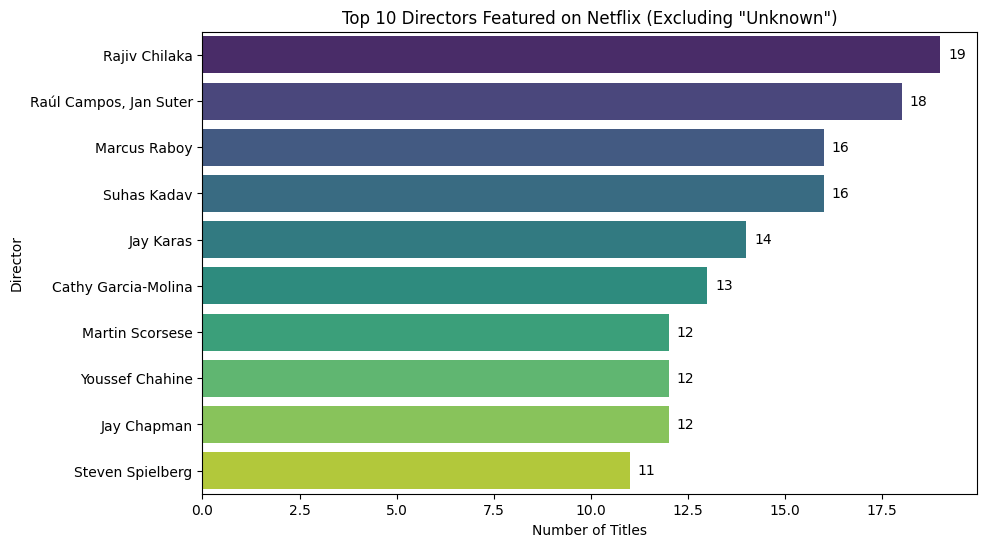

In [81]:
df_filtered = df.dropna(subset=['director'])
df_filtered = df_filtered[df_filtered['director'] != 'Unknown']
director_counts = df_filtered['director'].value_counts()
top_10_directors = director_counts.head(10)
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette='viridis')
plt.title('Top 10 Directors Featured on Netflix (Excluding "Unknown")')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
for i, v in enumerate(top_10_directors.values):
    barplot.text(v + 0.2, i, str(v), ha='left', va='center', color='black')

plt.show()

This graph shows the number of titles directed by the top 10 most featured directors on Netflix. I filtered 'Unknown' directors from the dataset to ensure data integrity. After calculating the number of titles associated with each director, I decided on displaying the top 10 most frequent ones. This can give us an idea on who is popular on Netflix and why.

## Title Release Dates Featured on Netflix

<ipython-input-82-d78bb86bb233>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='release_year', data=df, palette='viridis')


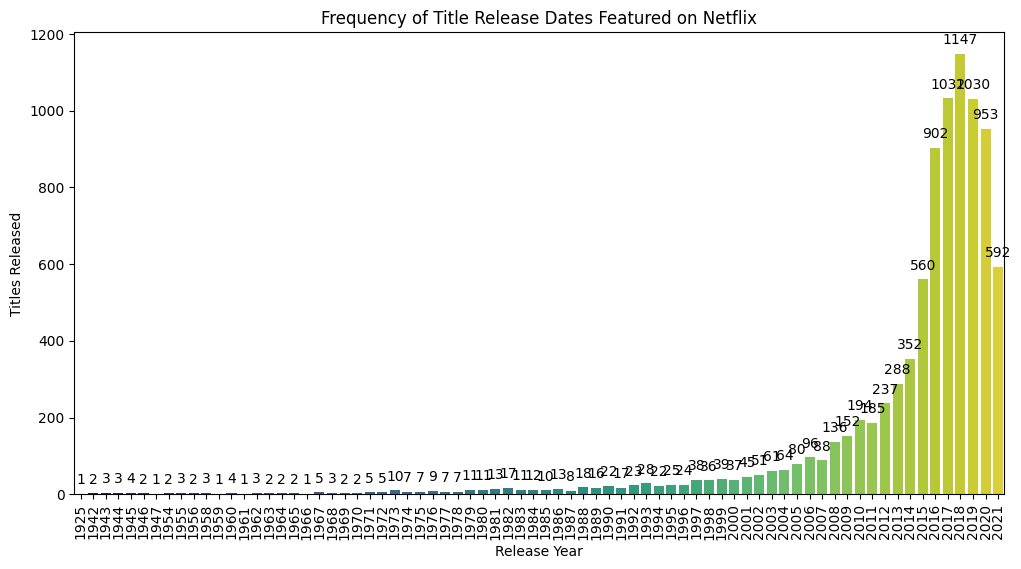

In [82]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='release_year', data=df, palette='viridis')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.title('Frequency of Title Release Dates Featured on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Titles Released')
plt.xticks(rotation=90)
plt.show()

This bar graph displays the frequency of title release dates featured on Netflix. The x-axis represents the release years, while the y-axis shows the number of titles released in each year. Generally, we see that Netflix features more modern films. This, once again, can give us insight to what is more popular and why. Netflix as a platform is able to continually stay relevant with their content by evolving and adapting to what their viewers generally want to see.

## What are the most popular genres?


<ipython-input-143-7538f1c905da>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_categories, data=df_top_10_categories, palette='viridis', order=top_10_categories)


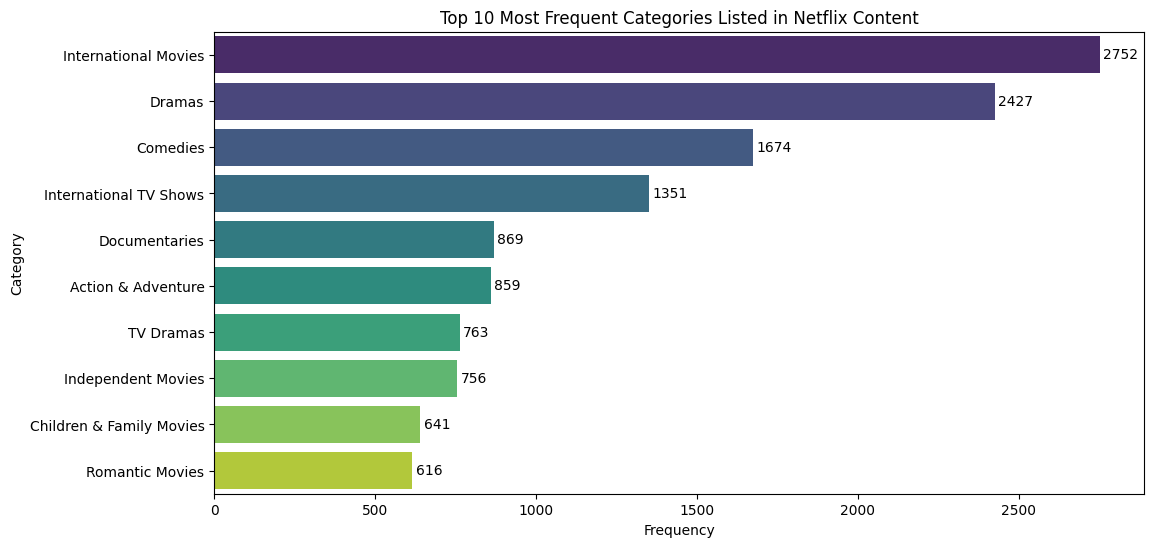

In [143]:
df_categories = df['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
top_10_categories = df_categories.value_counts().head(10).index
df_top_10_categories = df[df['listed_in'].str.split(', ').apply(lambda x: any(category in top_10_categories for category in x))]
df_categories = df_categories.reset_index(drop=True)
plt.figure(figsize=(12, 6))
sns.countplot(y=df_categories, data=df_top_10_categories, palette='viridis', order=top_10_categories)
plt.title('Top 10 Most Frequent Categories Listed in Netflix Content')
plt.xlabel('Frequency')
plt.ylabel('Category')
for i, v in enumerate(df_categories.value_counts().head(10)):
    plt.text(v + 10, i, str(v), color='black', va='center')
plt.show()

The graph above shows the top 10 most common genres on Netflix. The prevalence of these genres may indicate a certain level of appeal for these genres, suggesting their popularity. Further analysis is needed however, to establish that. Generally, it seems as though viewers prefer international content, dramas, comedies, documentaries, action and adventure, dramas, children and family content, and romantic movies. When making this bar graph, I had to separate the genres for each title. Since any given title can fall into a number of categories, this bar graph shows genres after they are separated. This gives us a more accurate idea of the top genres, and also gives us a more accurate count of the titles per genre.

## Network Analysis

## Network Graph of Top 25 Directors with Most Titles on Netflix

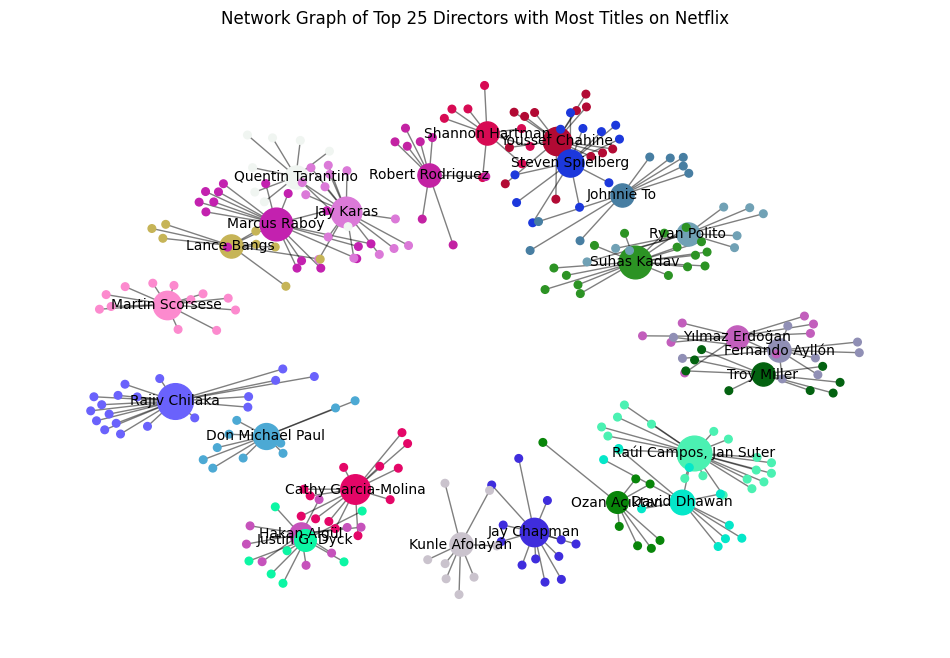

Director: Rajiv Chilaka, Degree Centrality: 0.06597222222222222
Director: Raúl Campos, Jan Suter, Degree Centrality: 0.0625
Director: Marcus Raboy, Degree Centrality: 0.05555555555555555
Director: Suhas Kadav, Degree Centrality: 0.05555555555555555
Director: Jay Karas, Degree Centrality: 0.048611111111111105
Director: Cathy Garcia-Molina, Degree Centrality: 0.04513888888888889
Director: Martin Scorsese, Degree Centrality: 0.041666666666666664
Director: Youssef Chahine, Degree Centrality: 0.041666666666666664
Director: Jay Chapman, Degree Centrality: 0.041666666666666664
Director: Steven Spielberg, Degree Centrality: 0.03819444444444444
Director: Don Michael Paul, Degree Centrality: 0.034722222222222224
Director: David Dhawan, Degree Centrality: 0.03125
Director: Yılmaz Erdoğan, Degree Centrality: 0.027777777777777776
Director: Lance Bangs, Degree Centrality: 0.027777777777777776
Director: Kunle Afolayan, Degree Centrality: 0.027777777777777776
Director: Quentin Tarantino, Degree Centra

In [146]:
degree_centrality = nx.degree_centrality(G)
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
directors = [director for director, _ in sorted_degree_centrality[:25]]
centrality_values = [degree_centrality[director] for director in directors]
plt.figure(figsize=(12, 8))
for director in directors:
    nx.draw_networkx_nodes(G, pos, nodelist=[director], node_size=centrality_values[directors.index(director)] * 10000,
                           node_color=[director_colors[director]], label='Directors')
    nx.draw_networkx_labels(G, pos, labels={director: director}, font_size=10)
for director in directors:
    titles = df_filtered[df_filtered['director'] == director]['title']
    title_nodes = [title for title in titles]
    nx.draw_networkx_nodes(G, pos, nodelist=title_nodes, node_size=30, node_color=[director_colors[director]] * len(title_nodes), label='Titles')
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title('Network Graph of Top 25 Directors with Most Titles on Netflix')
plt.axis('off')
plt.show()

for director, centrality in sorted_degree_centrality[:25]:
    print(f"Director: {director}, Degree Centrality: {centrality}")

This network graph visualizes the collaboration between the top 25 directors with the most titles on Netflix and the movies they directed. Each director is represented by a larger node, with a color assigned to each one, while their respective movies are depicted as smaller nodes, colored in the same hue as their director. In this case, the betweenness centrality is 0 and degree centrality varies for each director. This is because degree centrality measures the number of connections a node has, which for directors in this context would represent the number of movies they worked on. Since each director is connected only to the movies they directed, their degree centrality is related to the number of movies they directed. Betweenness centrality measures the impact of nodes on each other. In this case, since each director is connected only to their own movies, there are no interactions with outside nodes from other directors. For an example with betweenness centrality, we can look at the cast members and which directors they worked with.

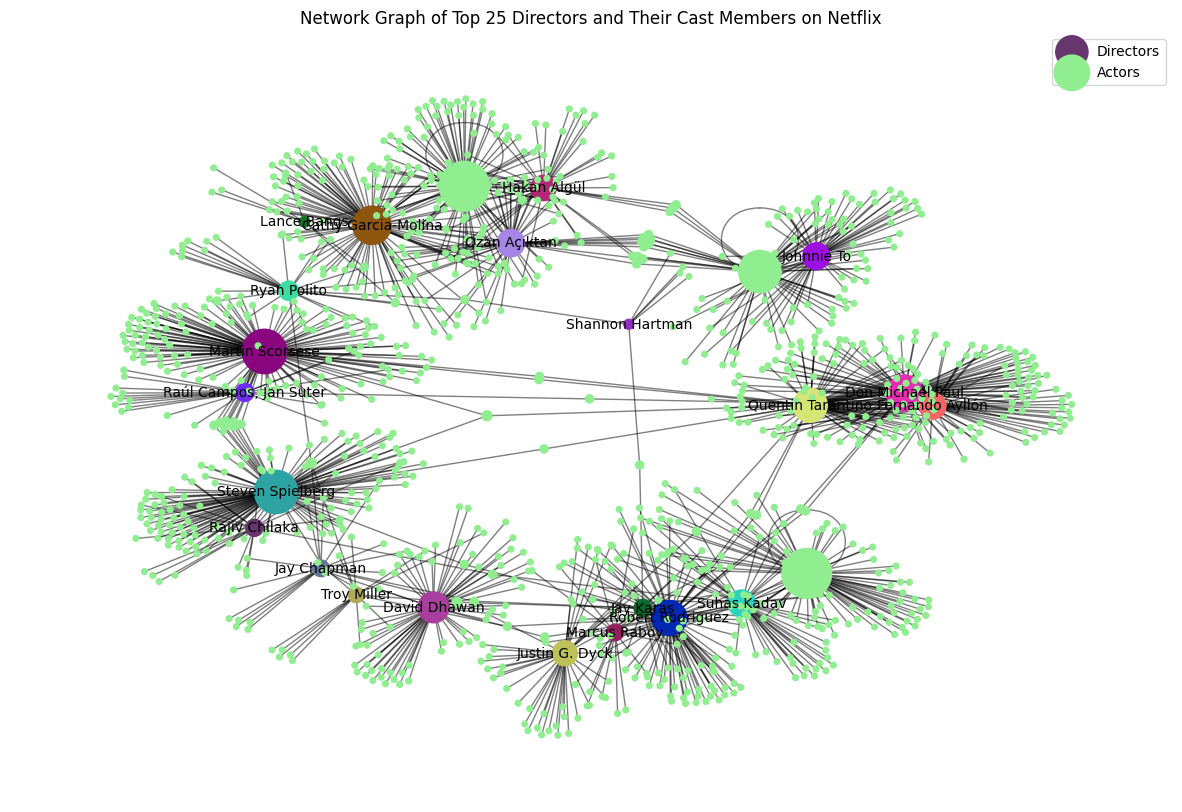

Director: Rajiv Chilaka, Degree Centrality: 0.015241320914479254, Betweenness Centrality: 0.001293072518262317
Director: Raúl Campos, Jan Suter, Degree Centrality: 0.01693480101608806, Betweenness Centrality: 0.0014451986968814132
Director: Marcus Raboy, Degree Centrality: 0.014394580863674851, Betweenness Centrality: 0.0001951807574735573
Director: Suhas Kadav, Degree Centrality: 0.03725656223539373, Betweenness Centrality: 0.002468462520989107
Director: Jay Karas, Degree Centrality: 0.016088060965283656, Betweenness Centrality: 0.01539877683163297
Director: Cathy Garcia-Molina, Degree Centrality: 0.07620660457239627, Betweenness Centrality: 0.005747786277070566
Director: Martin Scorsese, Degree Centrality: 0.10245554614733277, Betweenness Centrality: 0.10810585231433613
Director: Youssef Chahine, Degree Centrality: 0.06435224386113463, Betweenness Centrality: 0.0038763472495299874
Director: Jay Chapman, Degree Centrality: 0.014394580863674851, Betweenness Centrality: 0.01496080749349

In [156]:
df_filtered = df[df['director'] != 'Unknown']
top_directors = df_filtered['director'].value_counts().nlargest(25).index
G = nx.Graph()
director_colors = {director: np.random.rand(3,) for director in top_directors}
for director in top_directors:
    G.add_node(director, type='director', color=director_colors[director])
    titles = df_filtered[df_filtered['director'] == director]
    for cast_list in titles['cast']:
        if pd.notna(cast_list):
            cast_members = [cast.strip() for cast in cast_list.split(',')]
            for cast in cast_members:
                G.add_node(cast, type='actor')
                G.add_edge(director, cast)
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, seed=42,k=.11)
director_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'director']
actor_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'actor']
director_sizes = [10000 * degree_centrality[node] for node in director_nodes]
actor_sizes = [20000 * degree_centrality[node] for node in actor_nodes]
director_colors = [G.nodes[node]['color'] for node in director_nodes]
actor_colors = ['lightgreen' for node in actor_nodes]
nx.draw_networkx_nodes(G, pos, nodelist=director_nodes, node_size=director_sizes, node_color=director_colors, label='Directors')
nx.draw_networkx_nodes(G, pos, nodelist=actor_nodes, node_size=actor_sizes, node_color=actor_colors, label='Actors')
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels={node: node for node in director_nodes}, font_size=10)
plt.title('Network Graph of Top 25 Directors and Their Cast Members on Netflix')
plt.axis('off')
plt.legend()
plt.show()
for director in top_directors:
    print(f"Director: {director}, Degree Centrality: {degree_centrality[director]}, Betweenness Centrality: {betweenness_centrality[director]}")

This network graph visualizes the collaboration between the top 25 directors with the most titles on Netflix and the actors they have worked with. Each director is represented by a larger node, with their own color assigned, while actors are depicted as smaller green nodes. The size of each node corresponds to its degree centrality, indicating the number of connections a node has: directors have larger nodes if they directed more movies, and actors have larger nodes if they worked with more directors. This visualization highlights the collaborative relationships in the Netflix catalog, showing which actors have worked with multiple top directors and the central roles certain directors play within this network.

## Sentiment Analysis

In [161]:
def calculate_sentiment(description):
    words = description.split()
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_description = ' '.join(filtered_words)
    blob = TextBlob(filtered_description)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['description'].apply(calculate_sentiment)
print(df[['title', 'description', 'sentiment']].head())

                   title                                        description  \
0   Dick Johnson Is Dead  As her father nears the end of his life, filmm...   
1          Blood & Water  After crossing paths at a party, a Cape Town t...   
2              Ganglands  To protect his family from a powerful drug lor...   
3  Jailbirds New Orleans  Feuds, flirtations and toilet talk go down amo...   
4           Kota Factory  In a city of coaching centers known to train I...   

  sentiment  
0  Positive  
1   Neutral  
2   Neutral  
3   Neutral  
4   Neutral  


I decided to do a sentiment analysis of the title descriptions. I removed English stop words, and then used the TextBlob library to determine the sentiment polarity of the filtered description. For this part, I decided to only work with the english descriptions Based on the polarity score, it categorizes the sentiment as 'Positive', 'Negative', or 'Neutral'. The sentiment analysis is applied to each description in the DataFrame, and the results are stored in a new column called 'sentiment'.

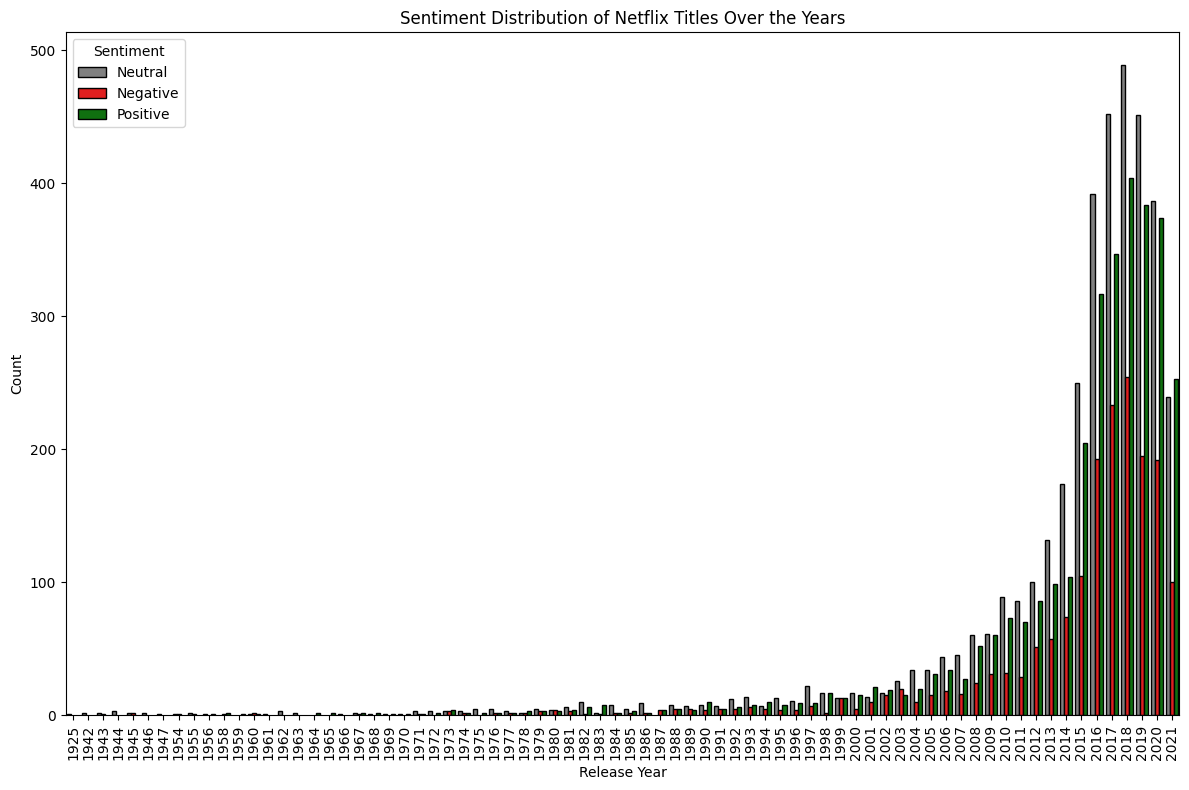

In [162]:
custom_palette = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'gray'}
plt.figure(figsize=(12, 8))
sns.countplot(x='release_year', hue='sentiment', data=df, palette=custom_palette, edgecolor='k')
plt.title('Sentiment Distribution of Netflix Titles Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

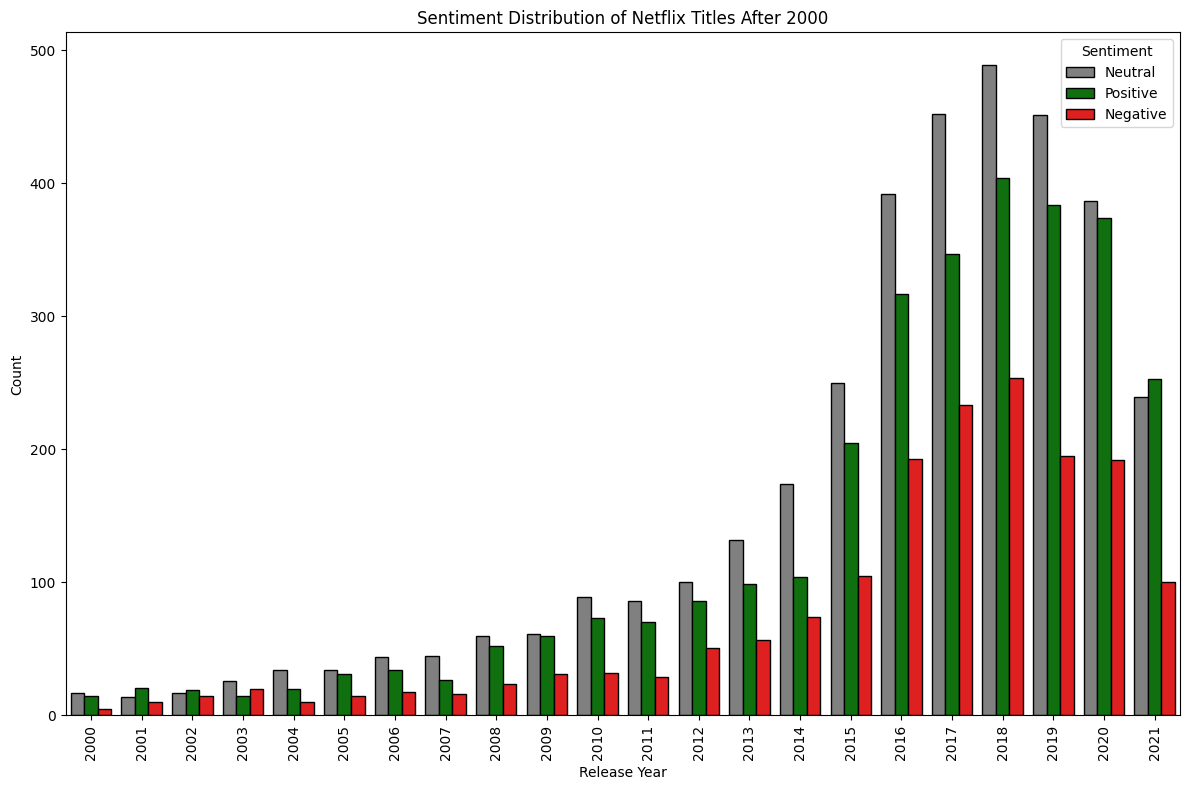

In [164]:
df_after_2000 = df[df['release_year'] >= 2000]
custom_palette = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'gray'}
plt.figure(figsize=(12, 8))
sns.countplot(x='release_year', hue='sentiment', data=df_after_2000, palette=custom_palette, edgecolor='k')
plt.title('Sentiment Distribution of Netflix Titles After 2000')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

As can be seen in the two graphs above, on a yearly basis, it seems as though generally the neutral sentiment has a greater frequency. This could be due to the fact that descriptions often use both positive and negative language when summarizing a show or movie.

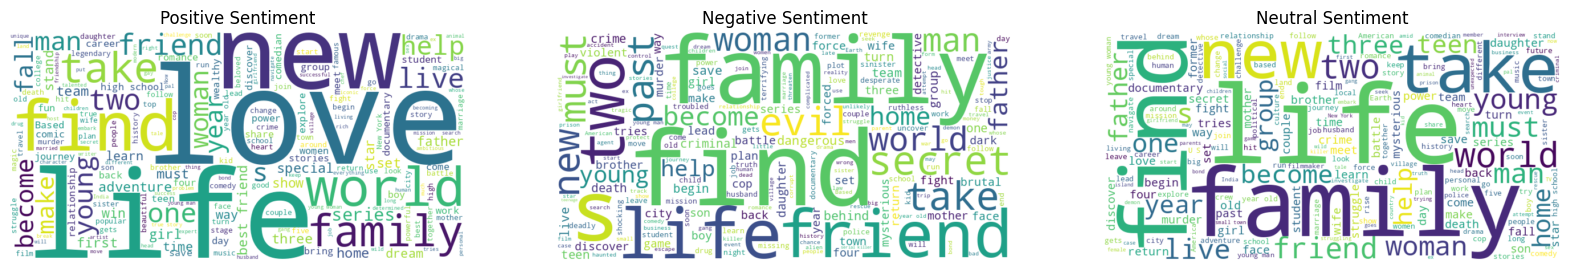

In [166]:
positive_descriptions = ' '.join(df[df['sentiment'] == 'Positive']['description'])
negative_descriptions = ' '.join(df[df['sentiment'] == 'Negative']['description'])
neutral_descriptions = ' '.join(df[df['sentiment'] == 'Neutral']['description'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_descriptions)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_descriptions)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_descriptions)
plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')
plt.subplot(132)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')
plt.subplot(133)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.axis('off')
plt.show()

I created word clouds for movie descriptions based on their sentiment (positive, negative, and neutral). We can see many similar words in all three of the sentiments, followed by varying background words. For instance, even though both positive sentiment and negative sentiment have the word "family", "family" was most likely taken from part of a phrase or sentence. Negative sentiment also has "evil" and "secret". A "secret" family has a negative connotation compared to a "dream" family which has positive meaning.

# Conclusions

Conducting a sentiment and network analysis on Netflix content has helped me lay a good foundation for a series of future projects. The network graph of top directors and their collaborations with actors highlights key figures and their influence within the Netflix platform. Sentiment analysis of title descriptions reveals that neutral sentiment is most common, potentially due to balanced language in show and movie summaries. Additionally, positive and negative sentiments exhibit distinct word associations, which can shape viewer perceptions. The visualization of genre popularity and release dates underscores Netflix's focus on modern and diverse content, catering to broad audience preferences to maximize viewership. Overall, this analysis offers a look into content trends and sentiment on Netflix, demonstrating the potential for deeper exploration. Going forward, combining this dataset with Twitter user data could help gauge audience sentiment more precisely, and help build a recommendation model based on viewer preferences. A recommendation model could further boost engagement and viewer satisfaction.

Presentation Link